In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_annotations(annotation_dir):
    names = ['bbox_left', 'bbox_top', 'bbox_width', 'bbox_height', 'score', 'object_category', 'truncation', 'occlusion']
    df = pd.DataFrame(columns=names)
    
    annotation_files = os.listdir(annotation_dir)
    for filename in tqdm(annotation_files):
        path = os.path.join(annotation_dir, filename)
        df_tmp = pd.read_csv(path, names=names)
        df = pd.concat([df, df_tmp])
    
    return df

In [3]:
train_df = read_annotations(annotation_dir='data/VisDrone2018-DET-train/annotations')
val_df = read_annotations(annotation_dir='data/VisDrone2018-DET-val/annotations')

100%|██████████| 1094/1094 [00:11<00:00, 98.14it/s]


In [4]:
object_categories = [
    'ignored regions', 'pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor', 'others'
]

occlusion_levels = ['No occlusion', 'Partially occluded', 'Heavily occluded']


def extract_category_distrib(df, object_categories):
    category_counts = []
    
    for occlusion_level in range(len(occlusion_levels)):
        category_counts_tmp = [0] * len(object_categories)
        for idx in range(len(object_categories)):
            category_counts_tmp[idx] = (((df['object_category'] == idx) & (df['occlusion'] == occlusion_level)).sum())
        
        category_counts.append(category_counts_tmp)
    
    return category_counts

In [5]:
train_distrib = extract_category_distrib(train_df, object_categories)
val_distrib = extract_category_distrib(val_df, object_categories)

In [6]:
def stacked_bar_plot(x, y_stacked, labels, ax):
    offset = [0] * len(y_stacked[0])
    
    for i in range(len(y_stacked)):
        y = y_stacked[i]
        label = labels[i]
        ax.bar(x, y, bottom=offset, label=label)
        offset = [(oi + yi) for (oi, yi) in zip(offset, y)]
        
    ax.legend()
    ax.grid()
    ax.set_xticklabels(x, rotation=90)

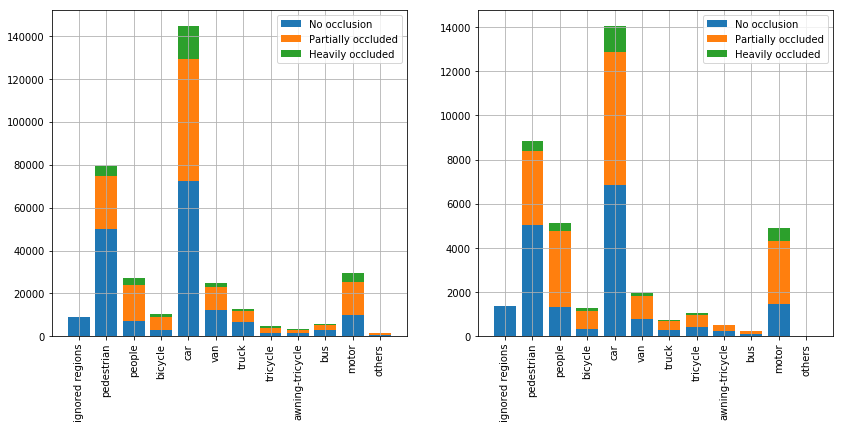

In [7]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(14,6))

stacked_bar_plot(object_categories, train_distrib, occlusion_levels, axL)
stacked_bar_plot(object_categories, val_distrib, occlusion_levels, axR)

In [8]:
train_df_2 = pd.DataFrame(train_distrib, columns=object_categories, index=occlusion_levels)
train_df_2

,ignored regions,pedestrian,people,bicycle,car,van,truck,tricycle,awning-tricycle,bus,motor,others
No occlusion,8813,49870,7332,2969,72444,12155,6560,1727,1379,3033,9808,756
Partially occluded,0,24920,16787,6061,56982,10709,5315,2352,1372,2452,15292,624
Heavily occluded,0,4545,2940,1447,15439,2086,996,724,492,441,4542,152


In [9]:
val_df_2 = pd.DataFrame(val_distrib, columns=object_categories, index=occlusion_levels)
val_df_2

,ignored regions,pedestrian,people,bicycle,car,van,truck,tricycle,awning-tricycle,bus,motor,others
No occlusion,1378,5019,1318,346,6834,764,302,408,237,124,1458,17
Partially occluded,0,3378,3429,808,6016,1046,382,568,274,113,2849,15
Heavily occluded,0,447,378,133,1214,165,66,69,21,14,579,0
